In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
df = pd.read_csv('Match_History_Details.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
df.head()

,GameId,Duration,Team1_Barons,Team1_Dragons,Team2_Barons,Team2_Dragons,Team1_Player1_Champion,Team1_Player2_Champion,Team1_Player3_Champion,Team1_Player4_Champion,...,Team1_Player1_Lane,Team1_Player2_Lane,Team1_Player3_Lane,Team1_Player4_Lane,Team1_Player5_Lane,Team2_Player1_Lane,Team2_Player2_Lane,Team2_Player3_Lane,Team2_Player4_Lane,Team2_Player5_Lane
0,3084513429,1540,0,0,1,2,86,37,268,81,...,TOP,BOTTOM,MIDDLE,BOTTOM,JUNGLE,TOP,MIDDLE,BOTTOM,JUNGLE,BOTTOM
1,3084446759,1642,0,4,1,0,99,29,23,113,...,BOTTOM,BOTTOM,TOP,JUNGLE,MIDDLE,BOTTOM,JUNGLE,JUNGLE,MIDDLE,BOTTOM
2,3084435694,1046,0,0,0,2,30,134,236,80,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,3083216368,1614,0,1,1,3,92,4,9,246,...,TOP,MIDDLE,BOTTOM,JUNGLE,BOTTOM,BOTTOM,JUNGLE,MIDDLE,BOTTOM,TOP
4,3083201609,1444,1,2,0,0,15,350,113,61,...,BOTTOM,BOTTOM,JUNGLE,MIDDLE,TOP,JUNGLE,BOTTOM,TOP,MIDDLE,BOTTOM


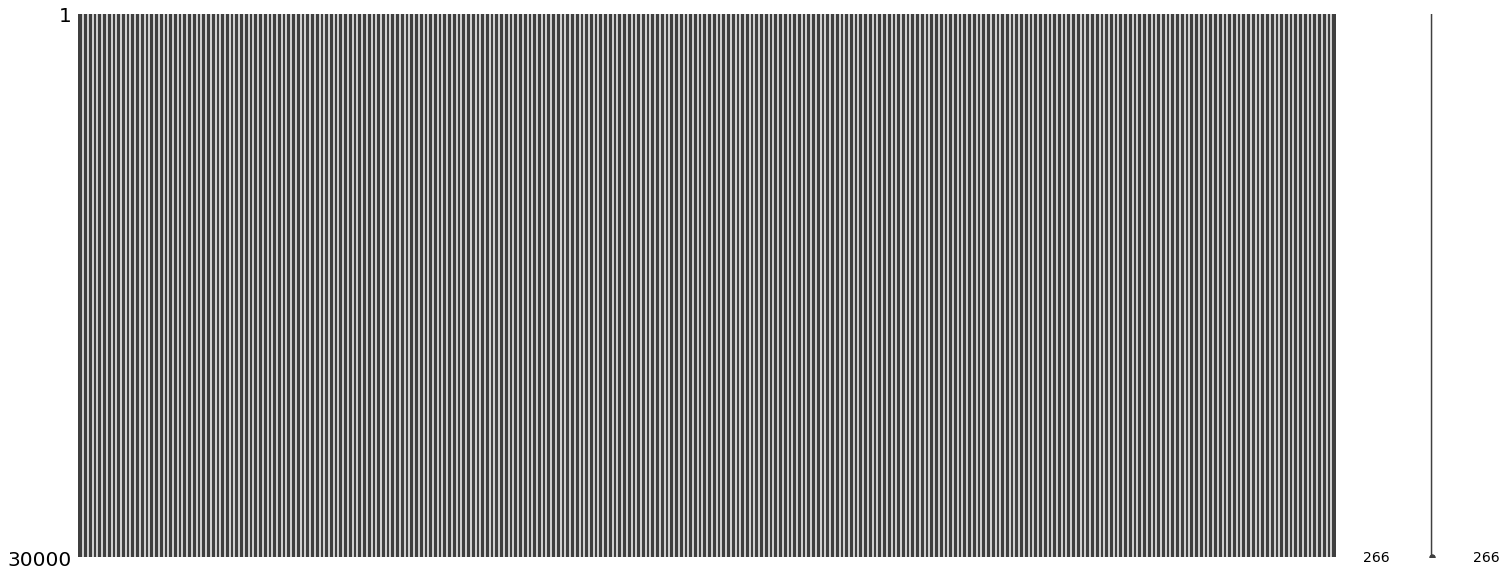

In [12]:
# To see if I am missing any info in my data, I use MissingNo to validate I have all the info in my data
msno.matrix(df)

# In order to assess the playstyles of the different lanes, I am going to use K-Means clustering for each lane

In [16]:
mid = df.query("Team1_Player1_Lane == 'MIDDLE'")[['Team1_Player1_Lane', 'Team1_Player1_Champion',
                                                  'Team1_Player1_Summoner']]

In [18]:
mid.head()

,Team1_Player1_Lane,Team1_Player1_Champion,Team1_Player1_Summoner
12,MIDDLE,68,FmLy7ZnFG4rASusicbskDIxXnmKqnZroa1pjxQHSpB1PIQ
13,MIDDLE,4,eBir9AyELV8P4RlW7v3y-SPnKMFCIqm_bhpa4sZarocTI08
18,MIDDLE,163,CdvbZGOaUL2ZdkQ2q_sN7Dfj6U-j43AIvQNMfgxYz5E26X...
23,MIDDLE,39,8mxGxOaBn8_NieSC3zfSK-qFSrYI7GnTqF2GZBo8x9ex_vI
28,MIDDLE,27,OnvXwXtBoDG_huG715XZ1WsxiLhO4_n8QfI5lvuXvZZ1qx...
